In [1]:
import kohonen as koh

In [78]:
reload(koh)

<module 'kohonen' from 'kohonen.py'>

Initial centers


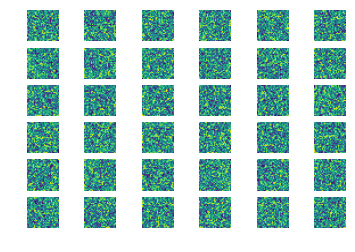

(40, 'length of grad array')


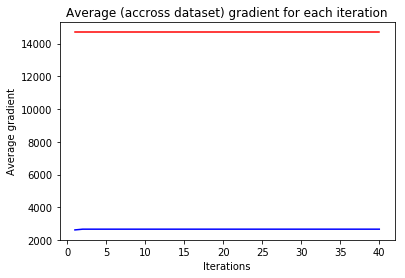

Final centers


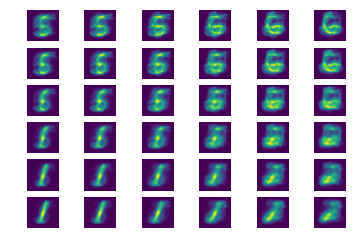

In [43]:
eta = 0.1
width = 6
sigma = 2.0
its = 20000
koh_ = koh.kohonen(eta,width,sigma,it)

# For small eta vary number of iterations

('maxium iterations is', 10000)
Initial centers


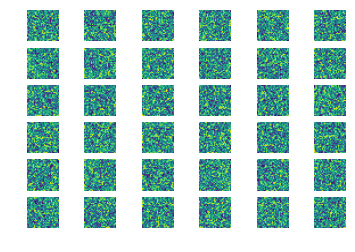

(5, 'length of grad array')


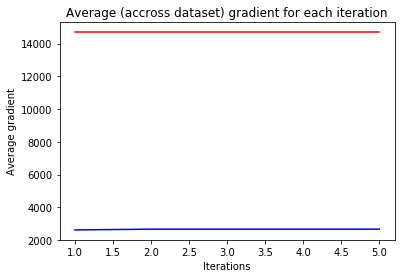

Final centers


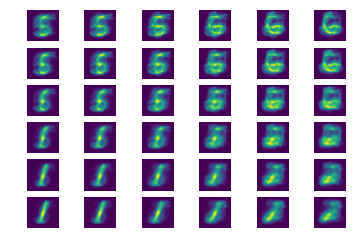

('maxium iterations is', 20000)
Initial centers


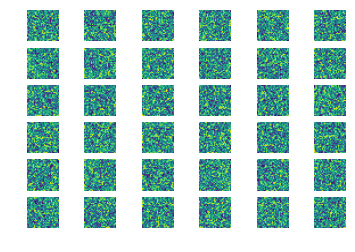

(10, 'length of grad array')


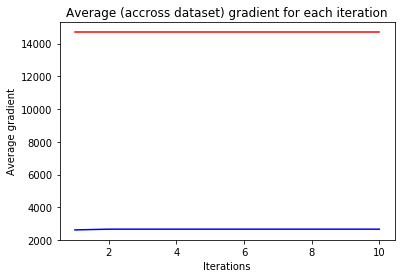

Final centers


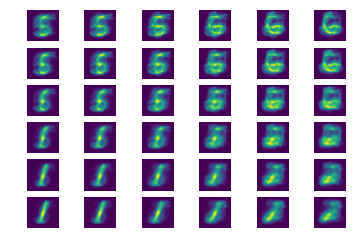

('maxium iterations is', 40000)
Initial centers


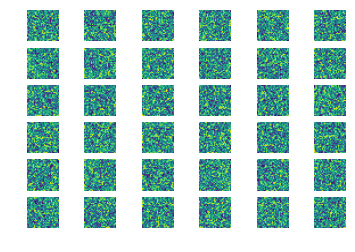

(20, 'length of grad array')


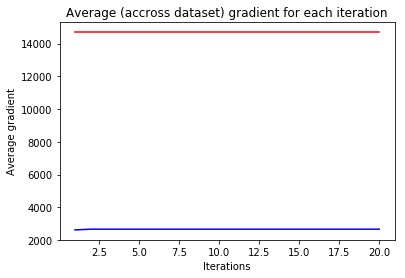

Final centers


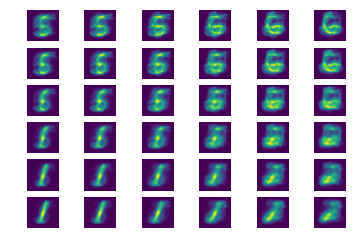

('maxium iterations is', 80000)
Initial centers


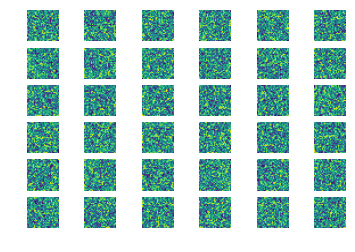

(40, 'length of grad array')


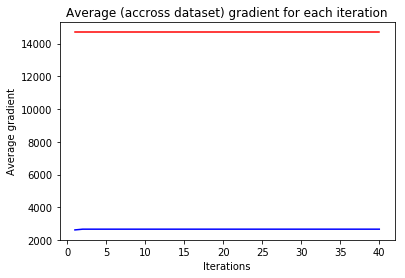

Final centers


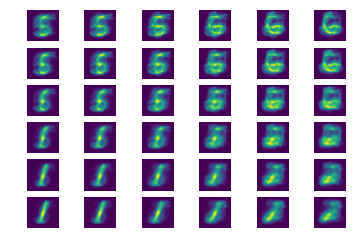

In [6]:
eta = 0.1
width = 6
sigma = 2.0
max_its = [10000,20000,40000,80000]
for it in max_its:
    print("maxium iterations is",it)
    koh.kohonen(eta,width,sigma,it)

# 1. Vary eta to look for best convergence

('Learnig rate is', 0.01)
Initial centers


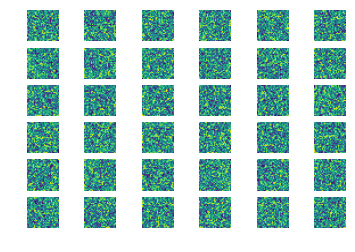

(10, 'length of grad array')


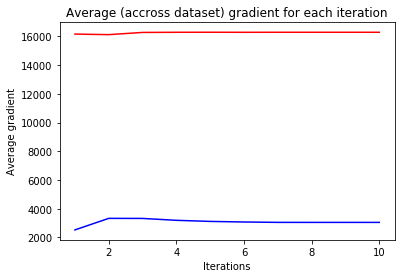

Final centers


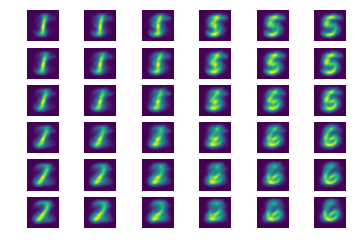

('Learnig rate is', 0.1)
Initial centers


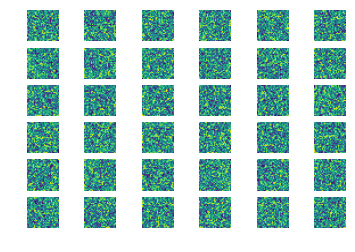

(10, 'length of grad array')


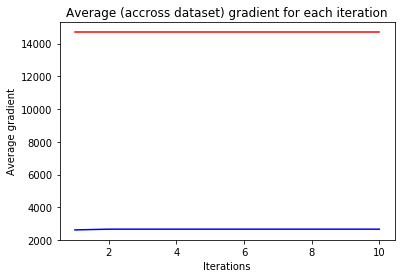

Final centers


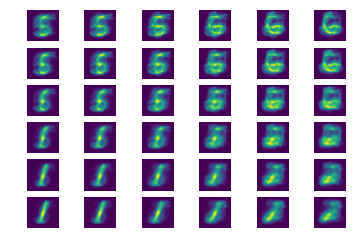

('Learnig rate is', 0.4)
Initial centers


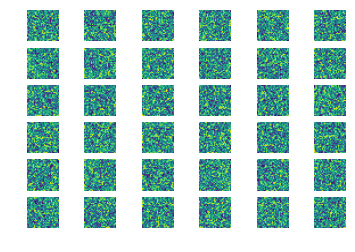

(10, 'length of grad array')


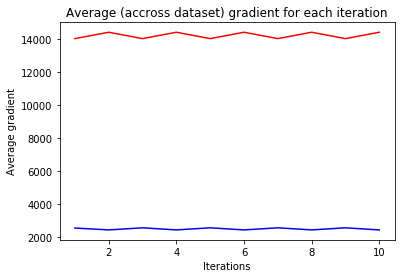

Final centers


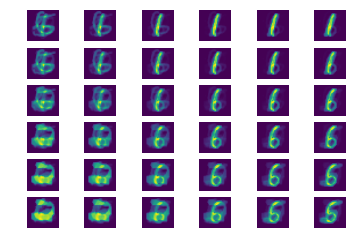

('Learnig rate is', 1.2)
Initial centers


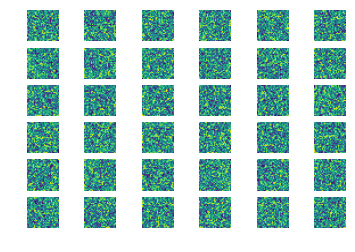

(10, 'length of grad array')


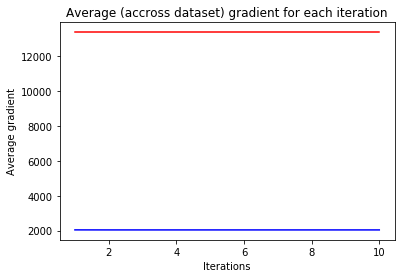

Final centers


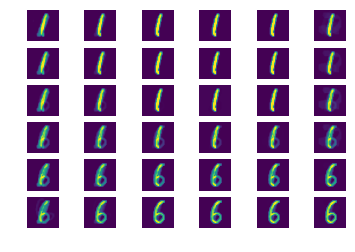

('Learnig rate is', 3.0)
Initial centers


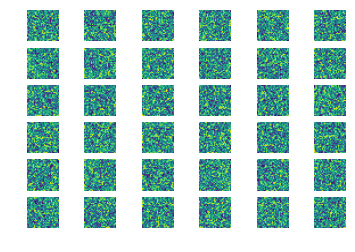

(10, 'length of grad array')


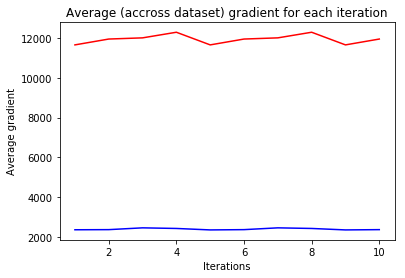

Final centers


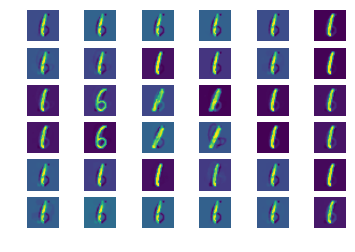

In [5]:
#etas = [0.01,0.1,0.4,1.2,3.0,5.,20.]
etas = [0.01,0.1,0.4,1.2,3.0]
#etas = [0.01,0.05, 0.1, 0.4]
width = 6
sigma = 2.0
max_it = 20000
for eta in etas:
    print("Learnig rate is",eta)
    koh.kohonen(eta,width,sigma,max_it)

# 2. Vary width of network

In [ ]:
eta = 0.3
widths = [4,6,8,10]
sigma = 2.0
for k in widths:
    print("Network size is",k)
    koh.kohonen(eta,k,sigma) 

# 3. Vary sigma of neighbourhood function

In [ ]:
eta = 0.3
width = 6
sigmas = [0.5,2.0,5.0,10.]
for s in sigmas:
    print("Sigma is",s)
    koh.kohonen(eta,width,s)

# 4. Assign digit to prototype

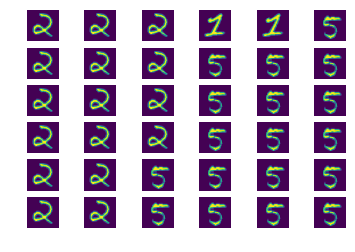

In [79]:
koh.assign_digit(koh_)

In [38]:
import numpy as np
m = [1,2,3,4,5,6,2,4,6,8]
n = [1,2,5,7]
#o = np.logical_or.reduce([m==x for x in n])
list(set(m)&set(n))

[1, 2, 5]

In [75]:
m = [1,2,3,4,5,6,2,4,6,8]
idx = []
for i in m:
    print(m.index(i))
    idx.append(m.index(i))
list(set(idx))

0
1
2
3
4
5
1
3
5
9


10